# SNS crawling를 사용하고 데이터 수집


*   snscrape를 사용 (https://github.com/JustAnotherArchivist/snscrape)


In [38]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import itertools

In [40]:
#검색하고 싶은 단어
search_word = "netflix"

#검색하는 기간
start_day = "2022-10-14"
end_day = "2022-10-15"

search_query = search_word + ' since:' + start_day + ' until:' + end_day 

#지정한 기간에서 검색하고 싶은 단어를 포함한 tweet를 취득
scraped_tweets = sntwitter.TwitterSearchScraper(search_query).get_items()

In [41]:
#처음부터 2000개의 tweets를 취득
sliced_scraped_tweets = itertools.islice(scraped_tweets, 2000)

In [42]:
#pandas DataFrame으로 변환
df = pd.DataFrame(sliced_scraped_tweets)

In [43]:
df

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/gingeraler34/status/158098...,2022-10-14 17:55:54+00:00,@inosapphic right like that netflix show is a ...,1580980732167872512,gingeraler34,[],,[],
1,https://twitter.com/Alflix_Server/status/15809...,2022-10-14 17:55:52+00:00,New 🇮🇹 show.\nEverything Calls for Salvation [...,1580980724290977792,Alflix_Server,[],,[],
2,https://twitter.com/bezerides/status/158098071...,2022-10-14 17:55:51+00:00,Belascoarán en Netflix: el detective idealista...,1580980718985162752,bezerides,[https://pijamasurf.com/2022/10/belascoaran_de...,https://pijamasurf.com/2022/10/belascoaran_de_...,[https://t.co/q7CuF87GyJ],https://t.co/q7CuF87GyJ
3,https://twitter.com/giginmb/status/15809806945...,2022-10-14 17:55:45+00:00,@andreariell Ela tbm fez filme na Netflix e at...,1580980694582378497,giginmb,[],,[],
4,https://twitter.com/Alflix_Server/status/15809...,2022-10-14 17:55:44+00:00,New 🇪🇸 show.\nSagrada familia [Netflix] was re...,1580980691822530560,Alflix_Server,[],,[],
...,...,...,...,...,...,...,...,...,...
1995,https://twitter.com/DanielKKelly/status/158097...,2022-10-14 17:15:50+00:00,Bring this back and finish up the story. No re...,1580970650210295808,DanielKKelly,[https://twitter.com/thecinesthetic/status/158...,https://twitter.com/thecinesthetic/status/1580...,[https://t.co/6zDS8CpwSZ],https://t.co/6zDS8CpwSZ
1996,https://twitter.com/jbevain/status/15809706464...,2022-10-14 17:15:49+00:00,@abolibibelot Y a des films sur Netflix?,1580970646464778241,jbevain,[],,[],
1997,https://twitter.com/Fernan_art_/status/1580970...,2022-10-14 17:15:49+00:00,@IsmelLCD @ElFrikiCubano Ismael tiene razón yo...,1580970644921290752,Fernan_art_,[],,[],
1998,https://twitter.com/IAM__WHOIAM/status/1580970...,2022-10-14 17:15:47+00:00,I need Netflix to put all the insidious movies...,1580970638138712064,IAM__WHOIAM,[],,[],


# content에 keyword가 없고 username에 keyword가 있는 경우도 있어서 그런 경우를 제거하자

In [44]:
df = df[df['content'].str.contains('Netflix|netflix|NETFLIX')]
df

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/gingeraler34/status/158098...,2022-10-14 17:55:54+00:00,@inosapphic right like that netflix show is a ...,1580980732167872512,gingeraler34,[],,[],
1,https://twitter.com/Alflix_Server/status/15809...,2022-10-14 17:55:52+00:00,New 🇮🇹 show.\nEverything Calls for Salvation [...,1580980724290977792,Alflix_Server,[],,[],
2,https://twitter.com/bezerides/status/158098071...,2022-10-14 17:55:51+00:00,Belascoarán en Netflix: el detective idealista...,1580980718985162752,bezerides,[https://pijamasurf.com/2022/10/belascoaran_de...,https://pijamasurf.com/2022/10/belascoaran_de_...,[https://t.co/q7CuF87GyJ],https://t.co/q7CuF87GyJ
3,https://twitter.com/giginmb/status/15809806945...,2022-10-14 17:55:45+00:00,@andreariell Ela tbm fez filme na Netflix e at...,1580980694582378497,giginmb,[],,[],
4,https://twitter.com/Alflix_Server/status/15809...,2022-10-14 17:55:44+00:00,New 🇪🇸 show.\nSagrada familia [Netflix] was re...,1580980691822530560,Alflix_Server,[],,[],
...,...,...,...,...,...,...,...,...,...
1995,https://twitter.com/DanielKKelly/status/158097...,2022-10-14 17:15:50+00:00,Bring this back and finish up the story. No re...,1580970650210295808,DanielKKelly,[https://twitter.com/thecinesthetic/status/158...,https://twitter.com/thecinesthetic/status/1580...,[https://t.co/6zDS8CpwSZ],https://t.co/6zDS8CpwSZ
1996,https://twitter.com/jbevain/status/15809706464...,2022-10-14 17:15:49+00:00,@abolibibelot Y a des films sur Netflix?,1580970646464778241,jbevain,[],,[],
1997,https://twitter.com/Fernan_art_/status/1580970...,2022-10-14 17:15:49+00:00,@IsmelLCD @ElFrikiCubano Ismael tiene razón yo...,1580970644921290752,Fernan_art_,[],,[],
1998,https://twitter.com/IAM__WHOIAM/status/1580970...,2022-10-14 17:15:47+00:00,I need Netflix to put all the insidious movies...,1580970638138712064,IAM__WHOIAM,[],,[],


# 텍스트 데이터를 전처리

In [45]:
# df의 열 정보를 확인
df.columns

Index(['url', 'date', 'content', 'id', 'username', 'outlinks', 'outlinksss',
       'tcooutlinks', 'tcooutlinksss'],
      dtype='object')

In [46]:
#data frame에서 텍스트 데이터 열만 추출
df.content

0       @inosapphic right like that netflix show is a ...
1       New 🇮🇹 show.\nEverything Calls for Salvation [...
2       Belascoarán en Netflix: el detective idealista...
3       @andreariell Ela tbm fez filme na Netflix e at...
4       New 🇪🇸 show.\nSagrada familia [Netflix] was re...
                              ...                        
1995    Bring this back and finish up the story. No re...
1996             @abolibibelot Y a des films sur Netflix?
1997    @IsmelLCD @ElFrikiCubano Ismael tiene razón yo...
1998    I need Netflix to put all the insidious movies...
1999    @hellostartupla Honestly I think this will gro...
Name: content, Length: 2000, dtype: object

In [47]:
# 각 트위트의 특징을 확인
for tweet in df.content:
  print(tweet)

@inosapphic right like that netflix show is a hit for a reason
New 🇮🇹 show.
Everything Calls for Salvation [Netflix] was recently added to Alflix. https://t.co/evcwDMrGgS
Belascoarán en Netflix: el detective idealista creado por Pago Ignacio Taibo II llega al streaming https://t.co/q7CuF87GyJ
@andreariell Ela tbm fez filme na Netflix e atuou mto bem
New 🇪🇸 show.
Sagrada familia [Netflix] was recently added to Alflix. https://t.co/9GJ1cGOnJN
https://t.co/SUXUrKtxIG Today it's the only track on Volume Two and 1/2 of Christian Lee Hutson's Version Suicides project, "The Day Robert Palins Murdered Me".

Here's the sketch from Tim Robinson's Netflix show: https://t.co/iIdYxLG2eM
Here's Christi… https://t.co/1G3ziscF3s https://t.co/TB4mkQhEMm
@elfancine @micinebelico Netflix reeditando la historia y adaptándola como propaganda de sus valores morales. Así les va. 
El libro es increíble. Leído y releído mil veces.
No he visto ninguna peli. No creo que estén a la altura.
Pero bueno, hay que arr

# 불요어(stop words)랑 불필요한 기호 등을 제거

In [48]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [50]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

불요어 추가

In [15]:
stop_words = stopwords.words('english')
print(stop_words)
stop_words.extend(["rt", "Netflix", "netflix"]) ###여기서  필요한 stopwords추가
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [51]:
import re
# 트위터분석을 위한 기본적인 텍스트 cleaning 함수
def CleanText(readData, Num=True, Eng=True):
    # Remove Retweets
    text = re.sub('RT @[\w_]+: ', '', readData)
    # Remove Mentions
    text = re.sub('@[\w_]+', '', text)
    # Remove or Replace URL
    text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", ' ',
                  text)  # http로 시작되는 url
    text = re.sub(r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{2,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", ' ',
                  text)  # http로 시작되지 않는 url
    # Remove only hashtag simbol "#" because hashtag contains huge information
    text = re.sub(r'#', ' ', text)
    # Remove Garbage Words (ex. &lt, &gt, etc)
    text = re.sub('[&]+[a-z]+', ' ', text)
    # Remove Special Characters
    text = re.sub('[^0-9a-zA-Zㄱ-ㅎ가-힣]', ' ', text)
    # Remove 출처 by yamada
    text = re.sub(r"(출처.*)", ' ', text)
    # Remove newline
    text = text.replace('\n', ' ')

    if Num is True:
        # Remove Numbers
        text = re.sub(r'\d+', ' ', text)

    if Eng is True:
        # Remove English
        text = re.sub('[a-zA-Z]', ' ', text)

    # Remove multi spacing & Reform sentence
    text = ' '.join(text.split())

    return text


tweet를 하나하나 불러오고 stopwords를 제거

In [52]:
cleaned_tweets_all = []

for tweet in df.content:
  cleaned_tweet = []
  cleaned_tweet_string = CleanText(tweet, Num=True, Eng=False)
  tweet_tokens = word_tokenize(cleaned_tweet_string)
  for token in tweet_tokens:
    if token.lower() not in stop_words:
      cleaned_tweet.append(token)

  print("---------------------")
  print("전처리 전:", word_tokenize(tweet))
  print("전처리 후:", cleaned_tweet)
  print("---------------------")
  cleaned_tweets_all.append(cleaned_tweet)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
---------------------
전처리 전: ['Netflix', ',', 'Amazon', ',', 'HBOMAX', ',', 'anyone', '-', 'please', 'make', 'a', 'street', 'fighter', 'animated', 'show', '.', 'Please', '.']
전처리 후: ['Amazon', 'HBOMAX', 'anyone', 'please', 'make', 'street', 'fighter', 'animated', 'show', 'Please']
---------------------
---------------------
전처리 전: ['@', 'prettyxprophet', 'Truly', '.', '@', 'netflix', 'put', 'a', 'warning', 'on', 'it', '!', '!']
전처리 후: ['Truly', 'put', 'warning']
---------------------
---------------------
전처리 전: ['@', 'Argumentum10', '@', 'viankaparis', '@', 'TigoPanama', '@', 'AsepPanama', 'No', 'le', 'paguen', 'más', '.', 'Todo', 'es', 'más', 'caro', 'en', 'Tigo', 'canales', 'con', 'programación', 'mala', 'y', 'hasta', 'con', 'propagandas', '.', 'Supuestamente', 'pagamos', 'para', 'no', 'tener', 'propagandas', '?', '?', '?', '@', 'tigobusinesspa', 'mejoren', 'su', 'oferta', 'o', 'nos', 'quedaremos', 'con', 'Netflix', 'de', 'por', 'vida']
전처리 후: ['l

In [53]:
len(cleaned_tweets_all)

2000

# Word Cloud 만들기

In [54]:
!pip install nltk
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
from wordcloud import WordCloud
import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# word cloud를 만드는 함수를 생성

In [56]:
def generate_wordcloud(text): 
    wordcloud = WordCloud(
                          width=800, height=400,
                          relative_scaling = 1.0,
                          stopwords = {'to', 'of'} #제거하고 싶은 단어를 여기에 입력
                          ).generate(text)
    
    fig = plt.figure(1, figsize=(8, 4))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.axis("off")

Word Cloud를 위해 단어의 리스트 모든 단어를 한 문자열으로 연결

In [57]:
all_words = []
for cleaned_tweet in cleaned_tweets_all:
  for word in cleaned_tweet:
    all_words.append(word)

all_words_str = ' '.join(all_words)

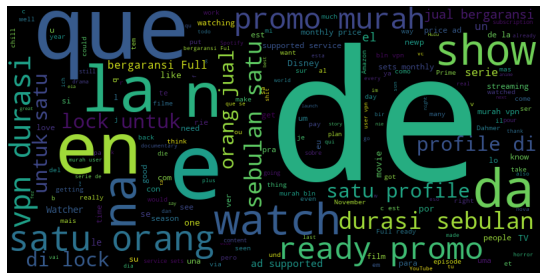

In [58]:
generate_wordcloud(all_words_str)

# 감성분석

In [59]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
import nltk
nltk.download([ "stopwords",  "vader_lexicon"])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [61]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = stopwords.words('english')
print(stop_words)
stop_words.extend(["rt", "Netflix", "netflix"]) ###여기서  필요한 stopwords추가
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

sentiment analysis check

In [62]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Wow, NLTK is really powerful!")

{'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.8012}

# 데이터셋 전체에 대해서 Sentiment Analysis 실행

In [63]:
sentiment_result = []

for tweet in df.content:
  cleaned_tweet = []
  cleaned_tweet_string = CleanText(tweet, Num=True, Eng=False)
  tweet_tokens = word_tokenize(cleaned_tweet_string)
  for token in tweet_tokens:
    if token.lower() not in stop_words:
      cleaned_tweet.append(token)

  cleaned_tweet_str = ' '.join(cleaned_tweet)
  print("전처리 전: " + tweet)
  print("전처리 후: " + cleaned_tweet_str)
  print(sia.polarity_scores(cleaned_tweet_str))

  #positive or negative 분류 compound score가 0 보다 크면 positive, 이하는 negative로 함
  compound_point = sia.polarity_scores(cleaned_tweet_str)['compound']
  if compound_point > 0:
    sentiment_result.append('Positive')

  else:
    sentiment_result.append('Negative')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
전처리 전: Netflix The Watcher has a ferret in it and I just love ferrets ! I used to have a pet ferret as a kid they really are the best.
전처리 후: Watcher ferret love ferrets used pet ferret kid really best
{'neg': 0.0, 'neu': 0.479, 'pos': 0.521, 'compound': 0.8655}
전처리 전: Omg yess NOA Netflix debut 🤧🤘✨😘🫶🔥🔥 https://t.co/u6k0mhb4uW
전처리 후: Omg yess NOA debut
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
전처리 전: Netflix lancera son offre "low-cost" supportée par la publicité en novembre https://t.co/xElgUd7OKB
전처리 후: lancera son offre low cost support e par la publicit en novembre
{'neg': 0.152, 'neu': 0.652, 'pos': 0.196, 'compound': 0.1531}
전처리 전: @salemome_mini Tu es un phénomène ta vie c'est une vraie série netflix
전처리 후: Tu es un ph nom ne ta vie c est une vraie rie
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
전처리 전: @milopond @offbeatcool mindhunter on netflix it was really good
전처리 후: mindhunter really good
{'neg': 0.0, 'neu': 0.385, 

감성분석의 시각화

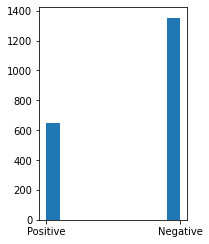

In [64]:
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [3.0, 3.50]
plt.rcParams["figure.autolayout"] = True

# Plot bar chart with data points
plt.hist(sentiment_result)

# Display the plot
plt.show()

# Topic Analysis

In [31]:
!pip install gensim
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [33]:
import gensim
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaSeqModel, LdaModel

In [34]:
cleaned_tweets_all = []

for tweet in df.content:
  cleaned_tweet = []
  cleaned_tweet_string = CleanText(tweet, Num=True, Eng=False)
  tweet_tokens = word_tokenize(cleaned_tweet_string)
  for token in tweet_tokens:
    if token.lower() not in stop_words:
      cleaned_tweet.append(token)

  # print("---------------------")
  # print("전처리 전:", word_tokenize(tweet))
  # print("전처리 후:", cleaned_tweet)
  # print("---------------------")
  cleaned_tweets_all.append(cleaned_tweet)

In [35]:
id2word = Dictionary(cleaned_tweets_all)
corpus = [id2word.doc2bow(text) for text in cleaned_tweets_all]

In [36]:
topic_number = 10 #10개의 topic group로 나눔

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=id2word,
                                                num_topics=topic_number,
                                                random_state=100,
                                                update_every=1,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                per_word_topics=True)

In [37]:
for topic_topwords in lda_model.print_topics():
  print(topic_topwords)

(0, '0.022*"show" + 0.021*"like" + 0.010*"people" + 0.008*"go" + 0.007*"streaming" + 0.007*"watch" + 0.007*"movies" + 0.005*"HBO" + 0.005*"yet" + 0.005*"saying"')
(1, '0.015*"one" + 0.014*"watch" + 0.013*"um" + 0.013*"movie" + 0.012*"watching" + 0.011*"would" + 0.010*"days" + 0.010*"see" + 0.009*"get" + 0.008*"really"')
(2, '0.028*"series" + 0.027*"est" + 0.010*"rie" + 0.009*"Dahmer" + 0.008*"going" + 0.006*"mas" + 0.006*"family" + 0.006*"v" + 0.006*"True" + 0.005*"TheWatcher"')
(3, '0.022*"por" + 0.016*"uma" + 0.014*"new" + 0.011*"plan" + 0.011*"ad" + 0.008*"im" + 0.008*"supported" + 0.007*"das" + 0.007*"thing" + 0.007*"November"')
(4, '0.076*"ja" + 0.036*"el" + 0.018*"una" + 0.014*"Disney" + 0.009*"su" + 0.008*"story" + 0.007*"Prime" + 0.007*"need" + 0.007*"anuncios" + 0.006*"seen"')
(5, '0.017*"para" + 0.015*"la" + 0.014*"un" + 0.014*"k" + 0.014*"l" + 0.014*"de" + 0.012*"le" + 0.012*"c" + 0.012*"Watcher" + 0.012*"sur"')
(6, '0.053*"satu" + 0.031*"di" + 0.029*"jual" + 0.027*"vpn" + 0

# 참고자료


*   https://www.nltk.org/
*   https://radimrehurek.com/gensim/

*   https://huggingface.co/ (for Deep Learning Models in NLP)
*   https://en.wikipedia.org/wiki/Word_embedding (Word Embedding 는 현재 NLP에서의 핵심 기술)



